## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [17]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target




### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

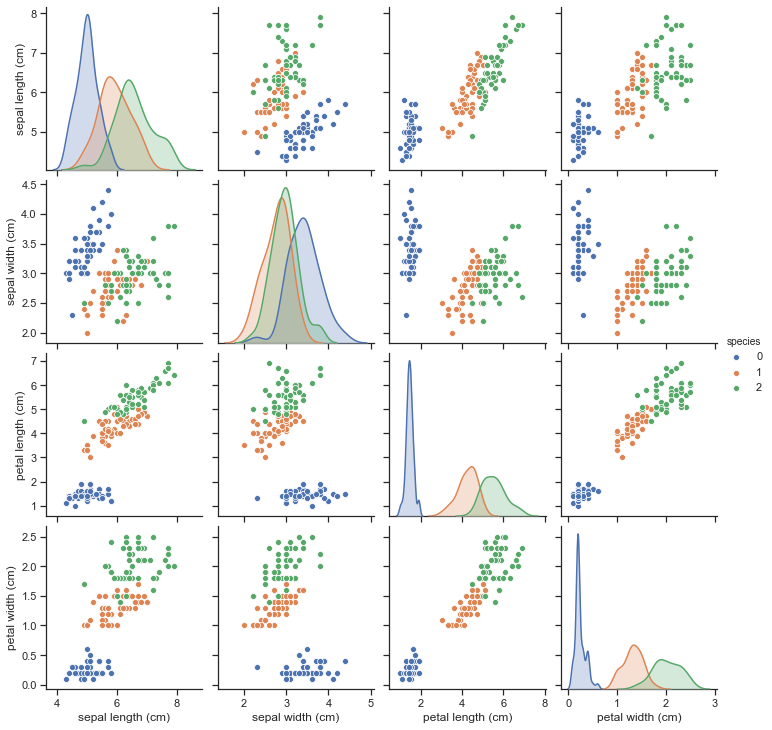

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [18]:
import seaborn as sbs

def myplotGrid(X,y):
    
      
    fig = plt.figure(figsize=(12,12))
    # creating a colour array
    colours = np.array(['r','g','b'])
    #creating a features array and putting in the relavant ones
    feat = ['alcohol','flavanoids','color_intensity','ash']
    lenf = len(feat)
    
    
    #loop through the number of features avail when
    #one feature is alreay being plotted 
    data=[]
    #Loop through 3 features which will be represent in one graph
    for a in range(lenf-1):
        #put the X vales inside the array if it matches the y data
        x = np.array([X[b] for b in range(len(X)) if y[b]==a])
        #add in the array
        data.append(x)
        
        
    for s in range(lenf):
        for p in range (lenf):
            #creating  matrix ( using the length of features)
            axes = fig.add_subplot(lenf,lenf,s+p*4+1)
            
            for m,d in enumerate(data):
            
               #using seaborn, I plotted the graph, with each colour repreenting a feature.
                if s==p:
                    sbs.kdeplot(X[:,s][y==m],color= colours[m-1] ,shade=True, alpha=0.2)
                # Using matplot lib scateer plot i plotted the features as well

                else:
                    plt.scatter(d[:,p],d[:,s],label= y, cmap=plt.cm.Paired,alpha =0.5)
                    
            # Pltting the label   
            if p==3:
                axes.set_xlabel(feat[s])
        
            if s==0:
                axes.set_ylabel(feat[p])
               

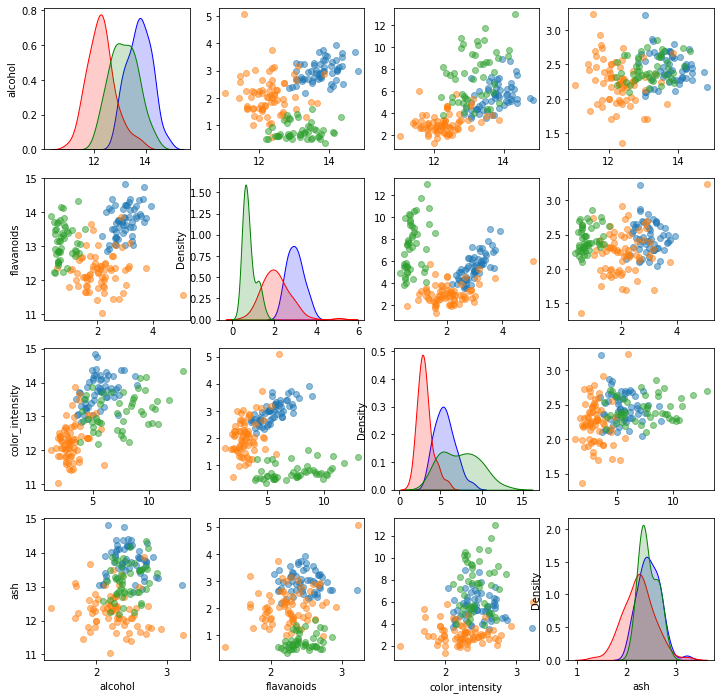

In [19]:


myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

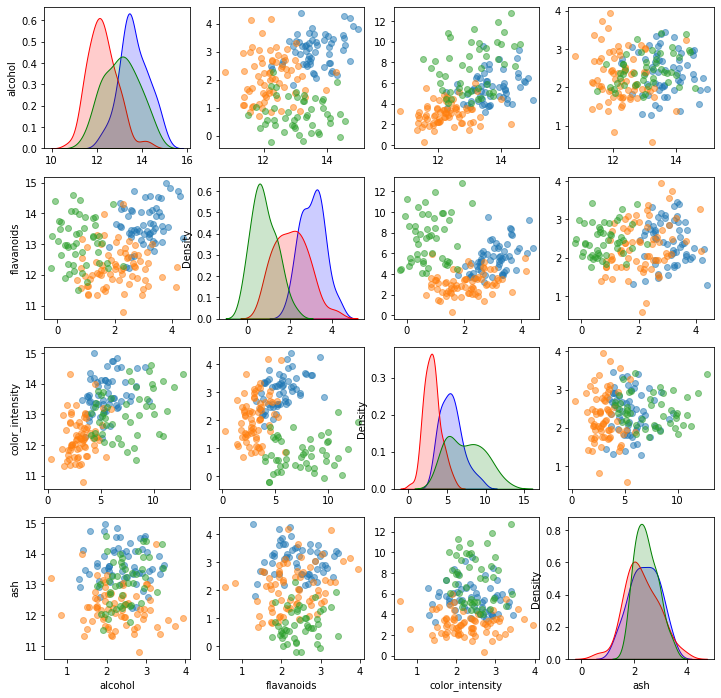

In [20]:
mySeed = 12345
np.random.seed(mySeed ) 
shapeX = X.shape
XN=X+np.random.normal(0,0.5,shapeX)
myplotGrid(XN, y)



### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

Flavanoids and colour intensity will be chosen to build a classifier
The values of the flvanoids and colour intensity appears to be more spread out. If i were to use a decision tree classifier, it will be able to differentiate between the 2 features with high accuracy.

    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:
Without noise, the data appears to be more packed together and compressed, there seems to be a problem of overfitting.
After adding noise, the graphs seem more spread out and the results are more generalised. If noise added a regulazing effect on the data. Additionally, the noise also helps to reduce the overfitting of data. This helps the classifier to be able to differntiate between the features more easily.




## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


The KNN code which is bulit in has the following in built functions : Euclidean Distance, X ,Y , neighbour and train_test_split. So in the myKNN algorithm, I am going to use the in-built functions as my functions in order for me to implement the KNN algorithm.

1) Euc Distance    
- Takes in 2 values
- loops through the range of a value
- apply formula
- apply sqrt
- return euc distance

2) Manhattan Distance
- Takes in 2 values
- loop through one of the values range
- apply formula (calculates the absolute differnces between the 2 vectors a,b)
- return Manhattan Distance

3)TrainTestSplit
- Takes in x value , y value and neighbour
- mySeed is used to ensure consistency
- obtain the amount of data i X which is 178
- created a random list using the X indices
- created a list of random indcies
- assign some to X 
- assign some to y
- to separate the data
- assinging certain portion of the data to X
- assigning certain portion of the data to y
- return result

4) KNN
- Takes in result from train test split
- Loop through the X_test data set.
- Getting distance between data points using euc, man
- This step is to get the small k ids within neighbours
- adding the k labels into the prediction list



In [21]:
#Helper
import math, random
import numpy as np



## Euclidean Dist helps to calculate the distance between 2 points
#This function takes in a,b which are x and y coordinates
def euclidean_distance(a, b):
   
    
    dist=0.0
    x = len(a)-1
    for i in range(x): #loops through the values( coordinates)
        dist = np.sum( (a[i]-b[i])**2) #the formula is applied here
        #The formula is to take the sqaure  sum of the difference between the 2 coordinates,
        Euc_dist = dist**(1/2) #Lastly, Square root to the dist to obtain the euc distance
    return Euc_dist

#added in the manhattan distance as well
def manhattan_distance(m, d):
    res_ult = 0
    for md in range(len(m)):
        man_abs = math.fabs(m[md] - d[md]) #calculates the absolute differnces between the 2 vectors a,b
        #math.fabs function helps to return the absolute value of the difference between a[i]-b[i]
        res_ult = res_ult +  man_abs #result in incremented
    return res_ult

def TrainTestSplit(X, y, testsize):
    np.random.seed(mySeed) #mySeed is used to ensure consistency
    shapeX = X.shape[0]# this is to obtain the amount of data i X which is 178
    ran_list = list(range(shapeX ))#created a random list using the X indices 
    ran_list = np.random.permutation(ran_list)# created a list of random indcies
    X = X[ran_list] #assign some to X
    y = y[ran_list]# assign some to y

     #Using slitpoint to separate the data
    splitpoint = len(X)*testsize
    
    #assinging certain portion of the data to X
    Xtesting, Xtraining= X[:int(splitpoint)],X[int(splitpoint):]
    #assigning certain portion of the data to y
    ytesting,ytraining = y[:int(splitpoint)], y[int(splitpoint):]
    
    #NOW WE would have obtained our relevant data
    return (Xtraining, Xtesting, ytraining, ytesting)

def mykNN(Xtrain, ytrain, Xtest, k, dist_type):
    predict=[]  
    # Fit and predict
    for a in Xtest: #Loop through the X_test data set.
       
        #Getting distance between data points using euc, man
        if dist_type=="euclidean":
            dist_ance = [euclidean_distance(a, b) for b in Xtrain]# using the euc distance function we computed earlier
        elif dist_type=="manhattan":
            dist_ance = [manhattan_distance(a, b) for b in Xtrain]# using the manhattan distance function we computed earlier       
        #
        k_id = np.argsort(dist_ance)[:k] #This step is to get the small k ids within neighbours
        labels=[]
        for m in k_id:
            h=ytrain[m]
        labels.append(h)
        labels = np.array(labels)
        predict.append(np.bincount(labels).argmax())# adding the k labels into the prediction list
    return np.array(predict)


Below I have implemented the Knn function nd it works.

In [22]:

Xtrain, Xtest, ytrain, y_test = TrainTestSplit(X, y, 0.5)
y_ = mykNN(Xtrain, ytrain, Xtest,5, "euclidean")
print(y_)
print(y_test)


[1 1 0 2 0 0 1 1 2 2 0 1 0 0 0 0 1 1 1 0 2 1 0 0 1 0 0 1 2 0 0 0 2 1 0 0 2
 0 2 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 1 2 1 1 2 0 1 1 0 0 1 1 1 0 1 2 1 1 1 2
 1 1 0 1 1 1 2 0 1 2 1 2 0 2 0]
[1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


1) Confusion Matrix
- create a matrix filled with zeros
- loop through data
- increment the matrix data by 1 
- retuen the value

2) Precision - indicates the quality of postive prediction 
- (Number of true positives divided by total positive preditions - --- trueposplusfalsepos
- Take the number of unique elements in y_
- Extact len and shape
- Make an array with the shape range filled w zero Pclass
- apply confustion matrix
- Loop thru Pclass
- add the matrices 
- divide matrice by true false

3) Accuracy - % of correct prediction for the dat
- Take the sum where both y_,ytest are equal.
- Divide by len(y)



In [23]:

def myConfusionMatrix(y_test,y_,n):
    m = np.zeros((n,n), int) 
    
    
    for x_c in range(len(y_)):#loop through data
        m[y_test[x_c]][y_[x_c]] +=  1 #increment the matrix data by 1 
        
    return m #retuen the conf matrix in array

#Prescision test it
def myPrec_ision(y_test,y_):
    uniqueclasses = np.unique (y_)#Take the number of unique elements in y_
    n = len(uniqueclasses) # Extact len and shape
    shape = uniqueclasses.shape #
    my_prec_ision = np.zeros(shape)#Make an array with the shape range filled w zero Pclass

    confmatrix = myConfusionMatrix(y_test,y_,n)#apply confustion matrix
    #Loop thru Pclass
    for a in range(n):
        truefalse = 0
        for b in uniqueclasses:
            m = confmatrix[b][a]
            n = confmatrix[a][a]
            #add the matrices 
            truefalse = truefalse + m
            #divide matrice by true false
        precisionClass = n/truefalse
        my_prec_ision[a] = precisionClass
        
    return my_prec_ision



def myAccuracy(y_test,y_):
#     - Take the sum where both y_,ytest are equal.
#     - Divide by len(y)
    
    return np.sum(np.where(y_test == y_,1,0))/len(y_)
    


In [24]:
#evaluation code
uniq = len(np.unique(y))
print(myConfusionMatrix(y_test,y_,uniq))    
print( myAccuracy(y_test,y_))
print(myPrec_ision(y_test,y_))



[[20  2  7]
 [ 7 30  1]
 [ 8  2 12]]
0.6966292134831461
[0.57142857 0.88235294 0.6       ]



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


<h2> Steps Taken NCV </h2>

- creating three array to assign the accuracy fold and the parameters fold
- An array for confusion matrices has also been added so that when the ncv function is called,we can compute the confusion matrix
- create an array with the number of X ( so there will be indices ranged from 0 to 178)
- randomise the indices in the list
- split array
 Inner Loop
- Loop through the folds and bins (nested)
- save validation indices
 - loop through
 next loop
 - Loop through neighbour and dist
 - assign a metric to obtain best result
 - apply knn and accuracy
 
   
- add validation set to training set
- trainfolds.extend(validationfolds)
- perform knn on folds
- y_predic=mykNN(X[trainfolds],y[trainfolds], X[testfolds], neigh_metric,dist_metric)
- compute accuracy if the folds
- accuracy_=myAccuracy(y[testfolds],y_predic)
- add the accuracy vale to the array
- acc_fold.append(accuracy)
- store the parameters in k
- k_params.append((dist_metric, neigh_metric))
- get the confusion metric and pass in the length of unique classes of y
 
 




In [25]:
import math,random
import numpy as np

def myNestedCrossVal(X,y,folds, neighbour,dists,mySeed):
    np.random.seed(mySeed)
    #creating three array to assign the accuracy fold and the parameters fold
    #An array for confusion matrices has also been added so that when the ncv function is called,
    #we can compute the confusion matrix
    acc_fold=[] #accuracy fold array
    k_params=[] #parameters fold array
    cm=[] # confusion matrix array
    
    #this function gets us the total number of X and in this case it is 178
    #this 178 is assigned to numberOfX
    numberOfX = X.shape[0]
    #create an array with the number of X ( so there will be indices ranged from 0 to 178)
    L= np.arange(numberOfX)
    #randomise the indices in the list
    random_indices_X = np.random.permutation(L)
  
    k_bins=np.array_split(random_indices_X, folds)
 
    
    trainfolds=[] 
    testfolds=[]  
    validationfolds=[]

    for a in range(folds):
            
        validationBin = (a+1)%folds #assiging values to val bin
        for b in range(0,len(k_bins)):#loop through random indices bin
            if (a == b): 
                testfolds = k_bins[a] #if equal, put in test folds
            elif (b == validationBin):
                validationfolds = k_bins[validationBin] #if = valbin, save as valBin
            else:
                trainfolds.extend(k_bins[b])#or add in trainfolds

      
        
        for d in dists:
            dist_metric='' 
            neigh_metric=-5 
            acc_metric=-14 #savebest acc metric
            for n in neighbour:
                #split to train and test
                y_predi= mykNN(X[trainfolds],y[trainfolds],X[validationfolds],n,d)
                acc_uracy = myAccuracy(y[validationfolds], y_predi)
                if acc_uracy > acc_metric:
                    dist_metric = d
                    neigh_metric= n
                    acc_metric = acc_uracy
        
        #add validation set to training set
        trainfolds.extend(validationfolds)
        #perform knn on folds
        y_predic=mykNN(X[trainfolds],y[trainfolds], X[testfolds], neigh_metric,dist_metric)
        #compute accuracy if the folds
        accuracy_=myAccuracy(y[testfolds],y_predic)
        #add the accuracy vale to the array
        acc_fold.append(acc_uracy)
        # store the parameters in k
        k_params.append((dist_metric, neigh_metric))
        # get the confusion metric and pass in the length of unique classes of y.
        c_mx= myConfusionMatrix(y[testfolds],y_predic,len(np.unique(y_predic)))
        cm.append(c_mx)
       
    return  acc_fold, k_params, np.array(cm);
    






In [26]:
#eval clean
#Clean
#dist type
distances_nv=["euclidean", "manhattan"]
mySeed=12345 #random my seed value
kFolds=5
accs_fold, params_k, cm = myNestedCrossVal(X,y,kFolds,list(range(1,11)),distances_nv,mySeed)
average_acc = np.average(accs_fold)
stand_dev = np.std(accs_fold)

In [27]:
#Noisy

distances_nv=["euclidean", "manhattan"]
mySeed=12345
kFolds=5
# Nested cross validation for noisy 
noisy_accs_fold, noisy_params_k, noisy_cm = myNestedCrossVal(XN,y,kFolds,list(range(1,11)),distances_nv,mySeed)

noisy_avg_acc = np.average(noisy_accs_fold)
# calc standard deviation
noisy_sd = np.std(noisy_accs_fold)

In [28]:
#print summary
#Making the accuracy column 

#calculate acc rounded in fold
accs_round=[round(a,2) for a in accs_fold]
#calculate the column for distance (euc oe manhattan)
distance_metrics=[params_k[a][0] for a in range(0,len(params_k))]
#calculate the column for parameters (k)
neighbours_m=[params_k[a][1] for a in range(0,len(params_k))]

#getting the data ready to be plotted in the table
data_clean = np.array([accs_round,neighbours_m,distance_metrics])


import pandas
#name columns
clean_columns=(["accuracy", "k", "distance"])
#plotting tha data into table form (clean)
df=pandas.DataFrame(data_clean.T,np.arange(1,kFolds+1), clean_columns,)
print("Clean")
print("\nAccuracy: %8.3f ± %8.3f" % (average_acc,  stand_dev))
print(df)









Clean

Accuracy:    0.916 ±    0.040
  accuracy  k   distance
1     0.92  6  manhattan
2     0.89  1  manhattan
3     0.86  1  manhattan
4     0.94  1  manhattan
5     0.97  1  manhattan


In [29]:
#Noisy
#Getting the acc fold for noisy 
noisy_accs_round=[round(b,2) for b in noisy_accs_fold]
#Getting the neighbour fold for noisy 
noisy_neighbours_m=[noisy_params_k[b][1] for b in range(len(noisy_params_k))]
#Getting the distance metric for nosiy
noisy_distance_metrics=[noisy_params_k[b][0] for b in range(len(noisy_params_k))]

#putting the noisy data in an array
data_noisy = np.array([noisy_accs_round,noisy_neighbours_m,noisy_distance_metrics])


import pandas
#naming coloumms for the table
noisy_columns=(["accuracy", "k", "distance"])
#putting the noisy data array in the table together with the noisy columns
df=pandas.DataFrame(data_noisy.T,np.arange(1,kFolds+1), noisy_columns,)
print("Noisy")
print("\nTotal accuracy: %8.3f ± %8.3f" % (noisy_avg_acc,  noisy_sd))
print(df)

Noisy

Total accuracy:    0.865 ±    0.055
  accuracy  k   distance
1     0.83  2  manhattan
2     0.83  1  manhattan
3      0.8  1  manhattan
4     0.94  1  manhattan
5     0.92  1  manhattan


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [30]:
cmShape =cm[0].shape
CM=np.zeros(cmShape)

for c_mx in cm:
    CM=np.add(CM,c_mx)    
print("clean")
print(CM)

ncmShape = noisy_cm[0].shape
NCM=np.zeros(ncmShape)
for ncmx in noisy_cm:
    NCM=np.add(NCM,ncmx)  
    
print("noisy")
print(NCM)




clean
[[59.  0.  0.]
 [ 1. 68.  2.]
 [ 0.  0. 48.]]
noisy
[[58.  1.  0.]
 [ 1. 69.  1.]
 [ 2.  0. 46.]]


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: K values above are slightly different when the noise is added to data. However, for the distance, it is all manhattan distance. In the summary results table, the change in the best parameters in clear.






### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

This tie might have occurred as the 2 point 1 and 2 are equidistant from an observation. To solve this i would choose the class whose value is the closest to the observation.

if len(neighbour1) < len(neighbour2) :

    class = neighbour1
else

    class = neighbour 2
    




### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:




Some considerations I would take is firstly, is that I would ensure that the value of KNN is always odd as a non odd value may result in a confusing result
Secondly, when using the breast cancer dataset or healthcare related datasets, make sure the data in  the datasets are accurately labelled. This will result in a more accurate result.
Lastly, the dataset should be noise free. This is appicable to especially the cancer dataset as it may noisy data may result in a impossible or impractical value.


